In [22]:
import pandas as pd
import seaborn as sns

In [77]:
tips = sns.load_dataset('tips')
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


1. 컬럼의 이름변경 -> [총 금액, 팁, 성별, 흡연여부, 요일, 시간 인원]
2. 총 금액과 팁 컬럼의 데이터를 소수점 첫째 자리까지 유지하고 반올림
3. 식사 인원, 성별에 따라(그룹화), 팁의 비율의 평균값을 구하고 시각화(바형 그래프)

In [78]:
tips.columns = ['총 금액', '팁', '성별', '흡연여부','요일','시간','인원']

In [79]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   총 금액    244 non-null    float64 
 1   팁       244 non-null    float64 
 2   성별      244 non-null    category
 3   흡연여부    244 non-null    category
 4   요일      244 non-null    category
 5   시간      244 non-null    category
 6   인원      244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [80]:
#tips['총 금액'] = round(tips['총 금액'],1)
#tips['팁'] = round(tips['팁'],1)

#tips['총 금액'] = tips['총 금액'].round(1)
#tips['팁'] = tips['팁'].round(1)

tips[['총 금액','팁']] = tips[['총 금액','팁']].round(1)

In [81]:
tips.head(2)

,총 금액,팁,성별,흡연여부,요일,시간,인원
0,17.0,1.0,Female,No,Sun,Dinner,2
1,10.3,1.7,Male,No,Sun,Dinner,3


In [215]:
# 팁 비율 = (팁 / 총 금액) *100
tips['팁 비율'] = tips['팁'] / tips['총 금액'] * 100
tips.head(3)

,총 금액,팁,성별,흡연여부,요일,시간,인원,팁의 비율,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667,16.666667


In [216]:
group_data = tips.groupby(['인원','성별']).mean()['팁 비율']
group_data

C:\Users\ezen\AppData\Local\Temp\ipykernel_2472\1450570463.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원','성별']).mean()['팁 비율']


인원  성별    
1   Male      22.093023
    Female    21.322912
2   Male      16.273796
    Female    17.053626
3   Male      14.763093
    Female    16.025679
4   Male      15.017047
    Female    13.267871
5   Male      13.371547
    Female    17.114094
6   Male      14.953486
    Female    16.306239
Name: 팁 비율, dtype: float64

<AxesSubplot: ylabel='인원,성별'>

C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from current font.
  func(*args, **kwargs)
C:\Users\ezen\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ezen\AppData\Ro

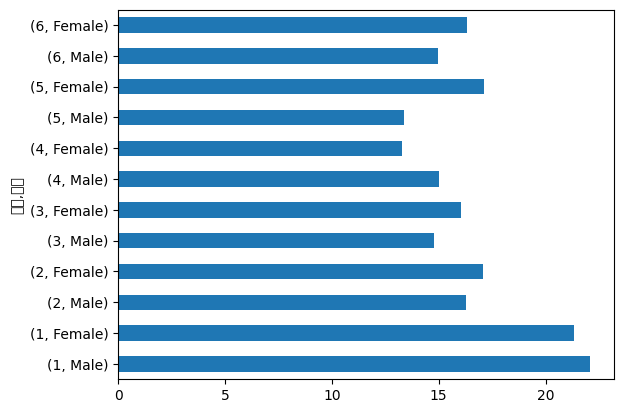

In [217]:
# matplot 사용하지 않고 출력

# tips_group.plot.bar()
group_data.plot.barh()  # 수평 바형 그래프

In [218]:
import matplotlib.pyplot as plt

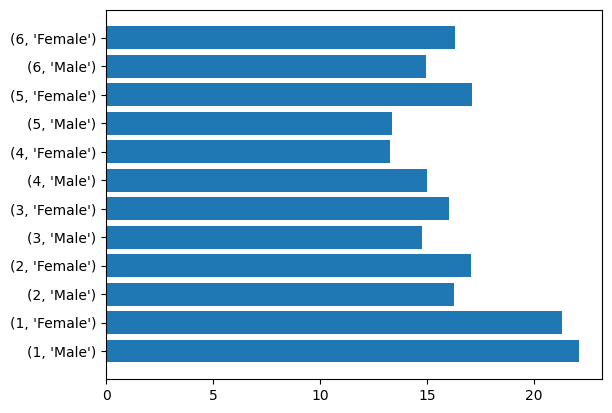

In [119]:
x = group_data.index
list_x = list(range(0,len(x),1))
y = group_data.values   # 시리즈 형태라서 
plt.barh(list_x,y)
plt.yticks(list_x,x)

plt.show()

In [219]:
group_data = tips.groupby(['인원','성별']).mean()[['팁 비율']]
group_data

C:\Users\ezen\AppData\Local\Temp\ipykernel_2472\153376217.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = tips.groupby(['인원','성별']).mean()[['팁 비율']]


팁 비율
인원 성별               
1  Male    22.093023
   Female  21.322912
2  Male    16.273796
   Female  17.053626
3  Male    14.763093
   Female  16.025679
4  Male    15.017047
   Female  13.267871
5  Male    13.371547
   Female  17.114094
6  Male    14.953486
   Female  16.306239

1. 남자의 팁 비율 데이터프레임 생성
2. 여자의 팁 비율 데이터프레임 생성
3. 2개의 데이터프레임을 시각화

In [222]:
group_data.index

MultiIndex([(1,   'Male'),
            (1, 'Female'),
            (2,   'Male'),
            (2, 'Female'),
            (3,   'Male'),
            (3, 'Female'),
            (4,   'Male'),
            (4, 'Female'),
            (5,   'Male'),
            (5, 'Female'),
            (6,   'Male'),
            (6, 'Female')],
           names=['인원', '성별'])

In [223]:
tips

,총 금액,팁,성별,흡연여부,요일,시간,인원,팁의 비율,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353,5.882353
1,10.3,1.7,Male,No,Sun,Dinner,3,16.504854,16.504854
2,21.0,3.5,Male,No,Sun,Dinner,3,16.666667,16.666667
3,23.7,3.3,Male,No,Sun,Dinner,2,13.924051,13.924051
4,24.6,3.6,Female,No,Sun,Dinner,4,14.634146,14.634146
...,...,...,...,...,...,...,...,...,...
239,29.0,5.9,Male,No,Sat,Dinner,3,20.344828,20.344828
240,27.2,2.0,Female,Yes,Sat,Dinner,2,7.352941,7.352941
241,22.7,2.0,Male,Yes,Sat,Dinner,2,8.810573,8.810573
242,17.8,1.8,Male,No,Sat,Dinner,2,10.112360,10.112360


In [224]:
test_df = pd.DataFrame()
test2_df = pd.DataFrame()

for i in tips.index:
    if i%10 == 0:
        test_df = pd.concat([test_df,tips.loc[[i]]])
    if i%50 == 0:
        test2_df = pd.concat([test2_df,tips.loc[[i]]])
test2_df

,총 금액,팁,성별,흡연여부,요일,시간,인원,팁의 비율,팁 비율
0,17.0,1.0,Female,No,Sun,Dinner,2,5.882353,5.882353
50,12.5,2.5,Male,No,Sun,Dinner,2,20.000000,20.000000
100,11.4,2.5,Female,Yes,Fri,Dinner,2,21.929825,21.929825
150,14.1,2.5,Male,No,Sun,Dinner,2,17.730496,17.730496
200,18.7,4.0,Male,Yes,Thur,Lunch,3,21.390374,21.390374


In [225]:
# step1 비어있는 데이터프레임 생성
Male_data = pd.DataFrame()
Female_data = pd.DataFrame()

In [226]:
## step2 : for문을 이용하여 male인 경우 1을 출력, female인 경우 2를 출력
for i in group_data.index:
    if i[1] == 'Male':
        print(1)
    else:
        print(2)

1
2
1
2
1
2
1
2
1
2
1
2


In [227]:
## step3 : for문을 이용하여 male인 경우, 해당하는 인덱스의 데이터를 출력
# loc[인덱스비교, 컬럼 비교]
# iloc[인덱스의 위치 비교, 컬럼의 위치비교] 
for i in group_data.index:
    if i[1] == 'Male':
        print(group_data.loc[[i]]) # loc[[i]]는 데이터프레임 형태로 표시
        
    else:
        print('female') 
        

              팁 비율
인원 성별             
1  Male  22.093023
female
              팁 비율
인원 성별             
2  Male  16.273796
female
              팁 비율
인원 성별             
3  Male  14.763093
female
              팁 비율
인원 성별             
4  Male  15.017047
female
              팁 비율
인원 성별             
5  Male  13.371547
female
              팁 비율
인원 성별             
6  Male  14.953486
female


In [228]:
## step3 : for문을 이용하여 male인 경우, 데이터 결합 
for i in group_data.index:
    data = group_data.loc[[i]]
    if i[1] == 'Male':
        #print(group_data.loc[[i]]) # loc[[i]]는 데이터프레임 형태로 표시
        Male_data = pd.concat([Male_data, data])
    else:
        #print(group_data.loc[[i]]) 
        Female_data = pd.concat([Female_data, data])

# print(Male_data)
# print(Female_data)
Male_data
Female_data

,,팁 비율
인원,성별,
1,Female,21.322912
2,Female,17.053626
3,Female,16.025679
4,Female,13.267871
5,Female,17.114094
6,Female,16.306239


TypeError: only size-1 arrays can be converted to Python scalars

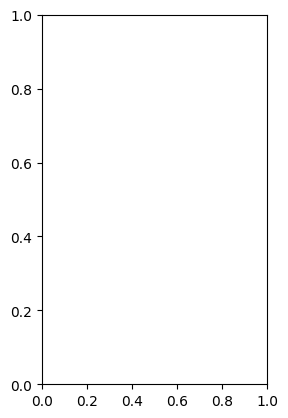

In [253]:
x1 = range(len(Male_data.index))
x2 = range(len(Female_data.index))
y1 = Male_data['팁 비율']      # 데이터프레임 형태라서 컬럼 선택
y2 = Female_data['팁 비율']   
# y1 = Male_data.values        # 시리즈에서만 가능 
# y2 = Female_data.values

plt.subplot(1,2,1)
plt.bar(x1,y1)
plt.subplot(1,2,2)
plt.bar(x2,y2,color='r')


<BarContainer object of 6 artists>

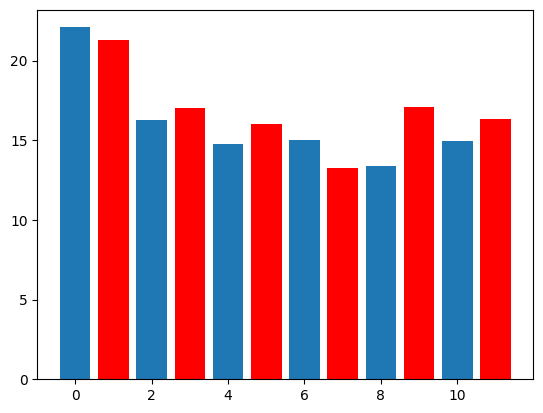

In [235]:
x1 = range(0,len(Male_data.index)*2,2)
x2 = range(1,len(Female_data.index)*2,2)
y1 = Male_data['팁 비율']
y2 = Female_data['팁 비율']

plt.bar(x1,y1)
plt.bar(x2,y2,color='r')

<BarContainer object of 6 artists>

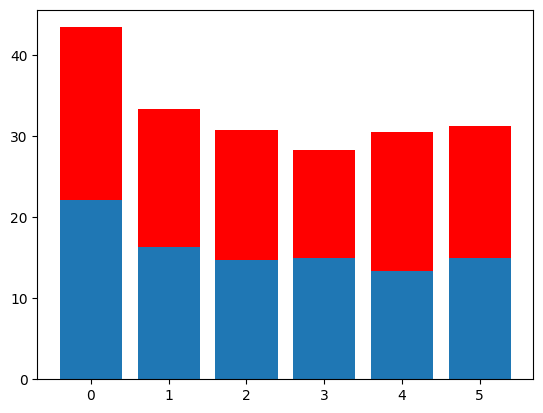

In [252]:
x1 = range(len(Male_data.index))
x2 = range(len(Female_data.index))
y1 = Male_data['팁 비율']
y2 = Female_data['팁 비율']

plt.bar(x1,y1)
plt.bar(x2,y2,bottom= y1, color='r')

## pivot_table
1. 그룹화
2. 행 인덱스
3. 열 인덱스
4. 데이터 값
5. 데이터의 집계

In [236]:
titanic = sns.load_dataset('titanic')\
         [['age','sex','class','fare','survived']]
titanic.head(3)

,age,sex,class,fare,survived
0,22.0,male,Third,7.2500,0
1,38.0,female,First,71.2833,1
2,26.0,female,Third,7.9250,1


In [237]:
pd.pivot_table(
    titanic,          ## 기준이 되는 데이터
    index = 'class',  ## 등급별로 그룹화
    columns= 'sex',   ## 성별로 분할
    values= 'age',    ## 그룹화된 데이터들의 나이를 선택
    aggfunc= 'mean'   ## 나이의 평균
)

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [247]:
# 클래스별 성별 생존자의 수를 출력
pd.pivot_table(
    titanic,               ## 기준이 되는 데이터
    index = 'class',       ## 등급별로 그룹화
    columns= 'sex',        ## 성별로 분할
    values= 'survived',    ## 그룹화된 데이터들의 나이를 선택
    aggfunc= 'sum'         ## 나이의 평균
)

sex,female,male
class,,
First,91,45
Second,70,17
Third,72,47


In [248]:
# 클래스별 성별 생존자의 수를 출력
pd.pivot_table(
    titanic,                 ## 기준이 되는 데이터
    index = ['class','sex'], ## 등급별/성별로 그룹화
    values= 'survived',      ## 그룹화된 데이터들의 나이를 선택
    aggfunc= 'sum'           ## 나이의 평균
)

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [246]:
titanic.groupby(['class','sex']).sum()['survived'] # 시리즈 형태로 출력

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [249]:
titanic.groupby(['class','sex']).sum()[['survived']] # 데이터프레임 형태로 출력

survived
class  sex             
First  female        91
       male          45
Second female        70
       male          17
Third  female        72
       male          47

In [251]:
# 클래스별 성별 생존자의 수를 출력
pd.pivot_table(
    titanic,                 ## 기준이 되는 데이터
    index = ['class','sex'], ## 등급별/성별로 그룹화
    columns= 'survived',     ## 생존자 선택
    values= 'age',           ## 그룹화된 데이터들의 나이를 선택
    aggfunc= 'mean'          ## 나이의 평균
)

survived               0          1
class  sex                         
First  female  25.666667  34.939024
       male    44.581967  36.248000
Second female  36.000000  28.080882
       male    33.369048  16.022000
Third  female  23.818182  19.329787
       male    27.255814  22.274211